# Librairies 

In [1]:
# kaggle competitions leaderboard --download idc-challenge-2022
# unzip idc-challenge-2022.zip
# rm idc-challenge-2022.zip

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime


from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve,roc_auc_score,auc,make_scorer
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from sklearn.feature_selection import SelectKBest
 

# Classement

<AxesSubplot:xlabel='TeamName'>

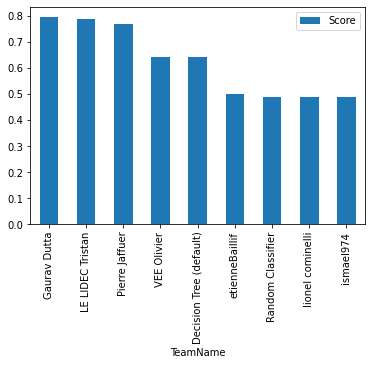

In [2]:
leaderboard = pd.read_csv("idc-challenge-2022-publicleaderboard.csv")
leaderboard.plot.bar(x="TeamName",y="Score")

# description données 

In [3]:
#    1 - age (numeric)
#    2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
#    3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
#    4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
#    5 - default: has credit in default? (categorical: "no","yes","unknown")
#    6 - housing: has housing loan? (categorical: "no","yes","unknown")
#    7 - loan: has personal loan? (categorical: "no","yes","unknown")
#    # related with the last contact of the current campaign:
#    8 - contact: contact communication type (categorical: "cellular","telephone") 
#    9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
#   10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
#   11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. /!\THIS ATTRIBUTE HAS BEEN REMOVED FOR THE CHALLENGE /!\
#    # other attributes:
#   12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#   13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#   14 - previous: number of contacts performed before this campaign and for this client (numeric)
#   15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
#    # social and economic context attributes
#   16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
#   17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
#   18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
#   19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
#   20 - nr.employed: number of employees - quarterly indicator (numeric)

# Chargement

In [4]:
# kaggle run
# training_data = "/kaggle/input/idc-challenge-2022/training_data.csv"
# test_data = "/kaggle/input/idc-challenge-2022/test_data.csv"
# cible = "/kaggle/input/idc-challenge-2022/training_classes.csv"

# test_data = pd.read_csv(test_data)
# X = pd.read_csv(training_data)
# variable_cible = pd.read_csv(cible)

# ----------------------------Chargement------------------------- 
# Local run 
test_data = pd.read_csv("test_data.csv")
X = pd.read_csv("training_data.csv")
variable_cible = pd.read_csv("training_classes.csv")
# ----------------------------Chargement------------------------- 

# Transformation 
class_label_encoder = LabelEncoder().fit(variable_cible['y'])
Y = class_label_encoder.transform(variable_cible['y'])

# data Servira pour la visualisation 

# Données utiles 
nombre_enregistrements = len(X)

# def remove_outlier(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out


# tmp = remove_outlier(pd.concat([X,pd.Series(Y,name='y')],axis=1),'age')
# tmp
# X = tmp.loc[:,'age':'nr.employed']
# Y = tmp['y']
DATA = pd.concat([X,pd.Series(name='y',data=Y)],axis=1)

In [5]:
Y

array([0, 0, 0, ..., 1, 0, 0])

# exploration des données

## Visualisation

<AxesSubplot:xlabel='poutcome', ylabel='count'>

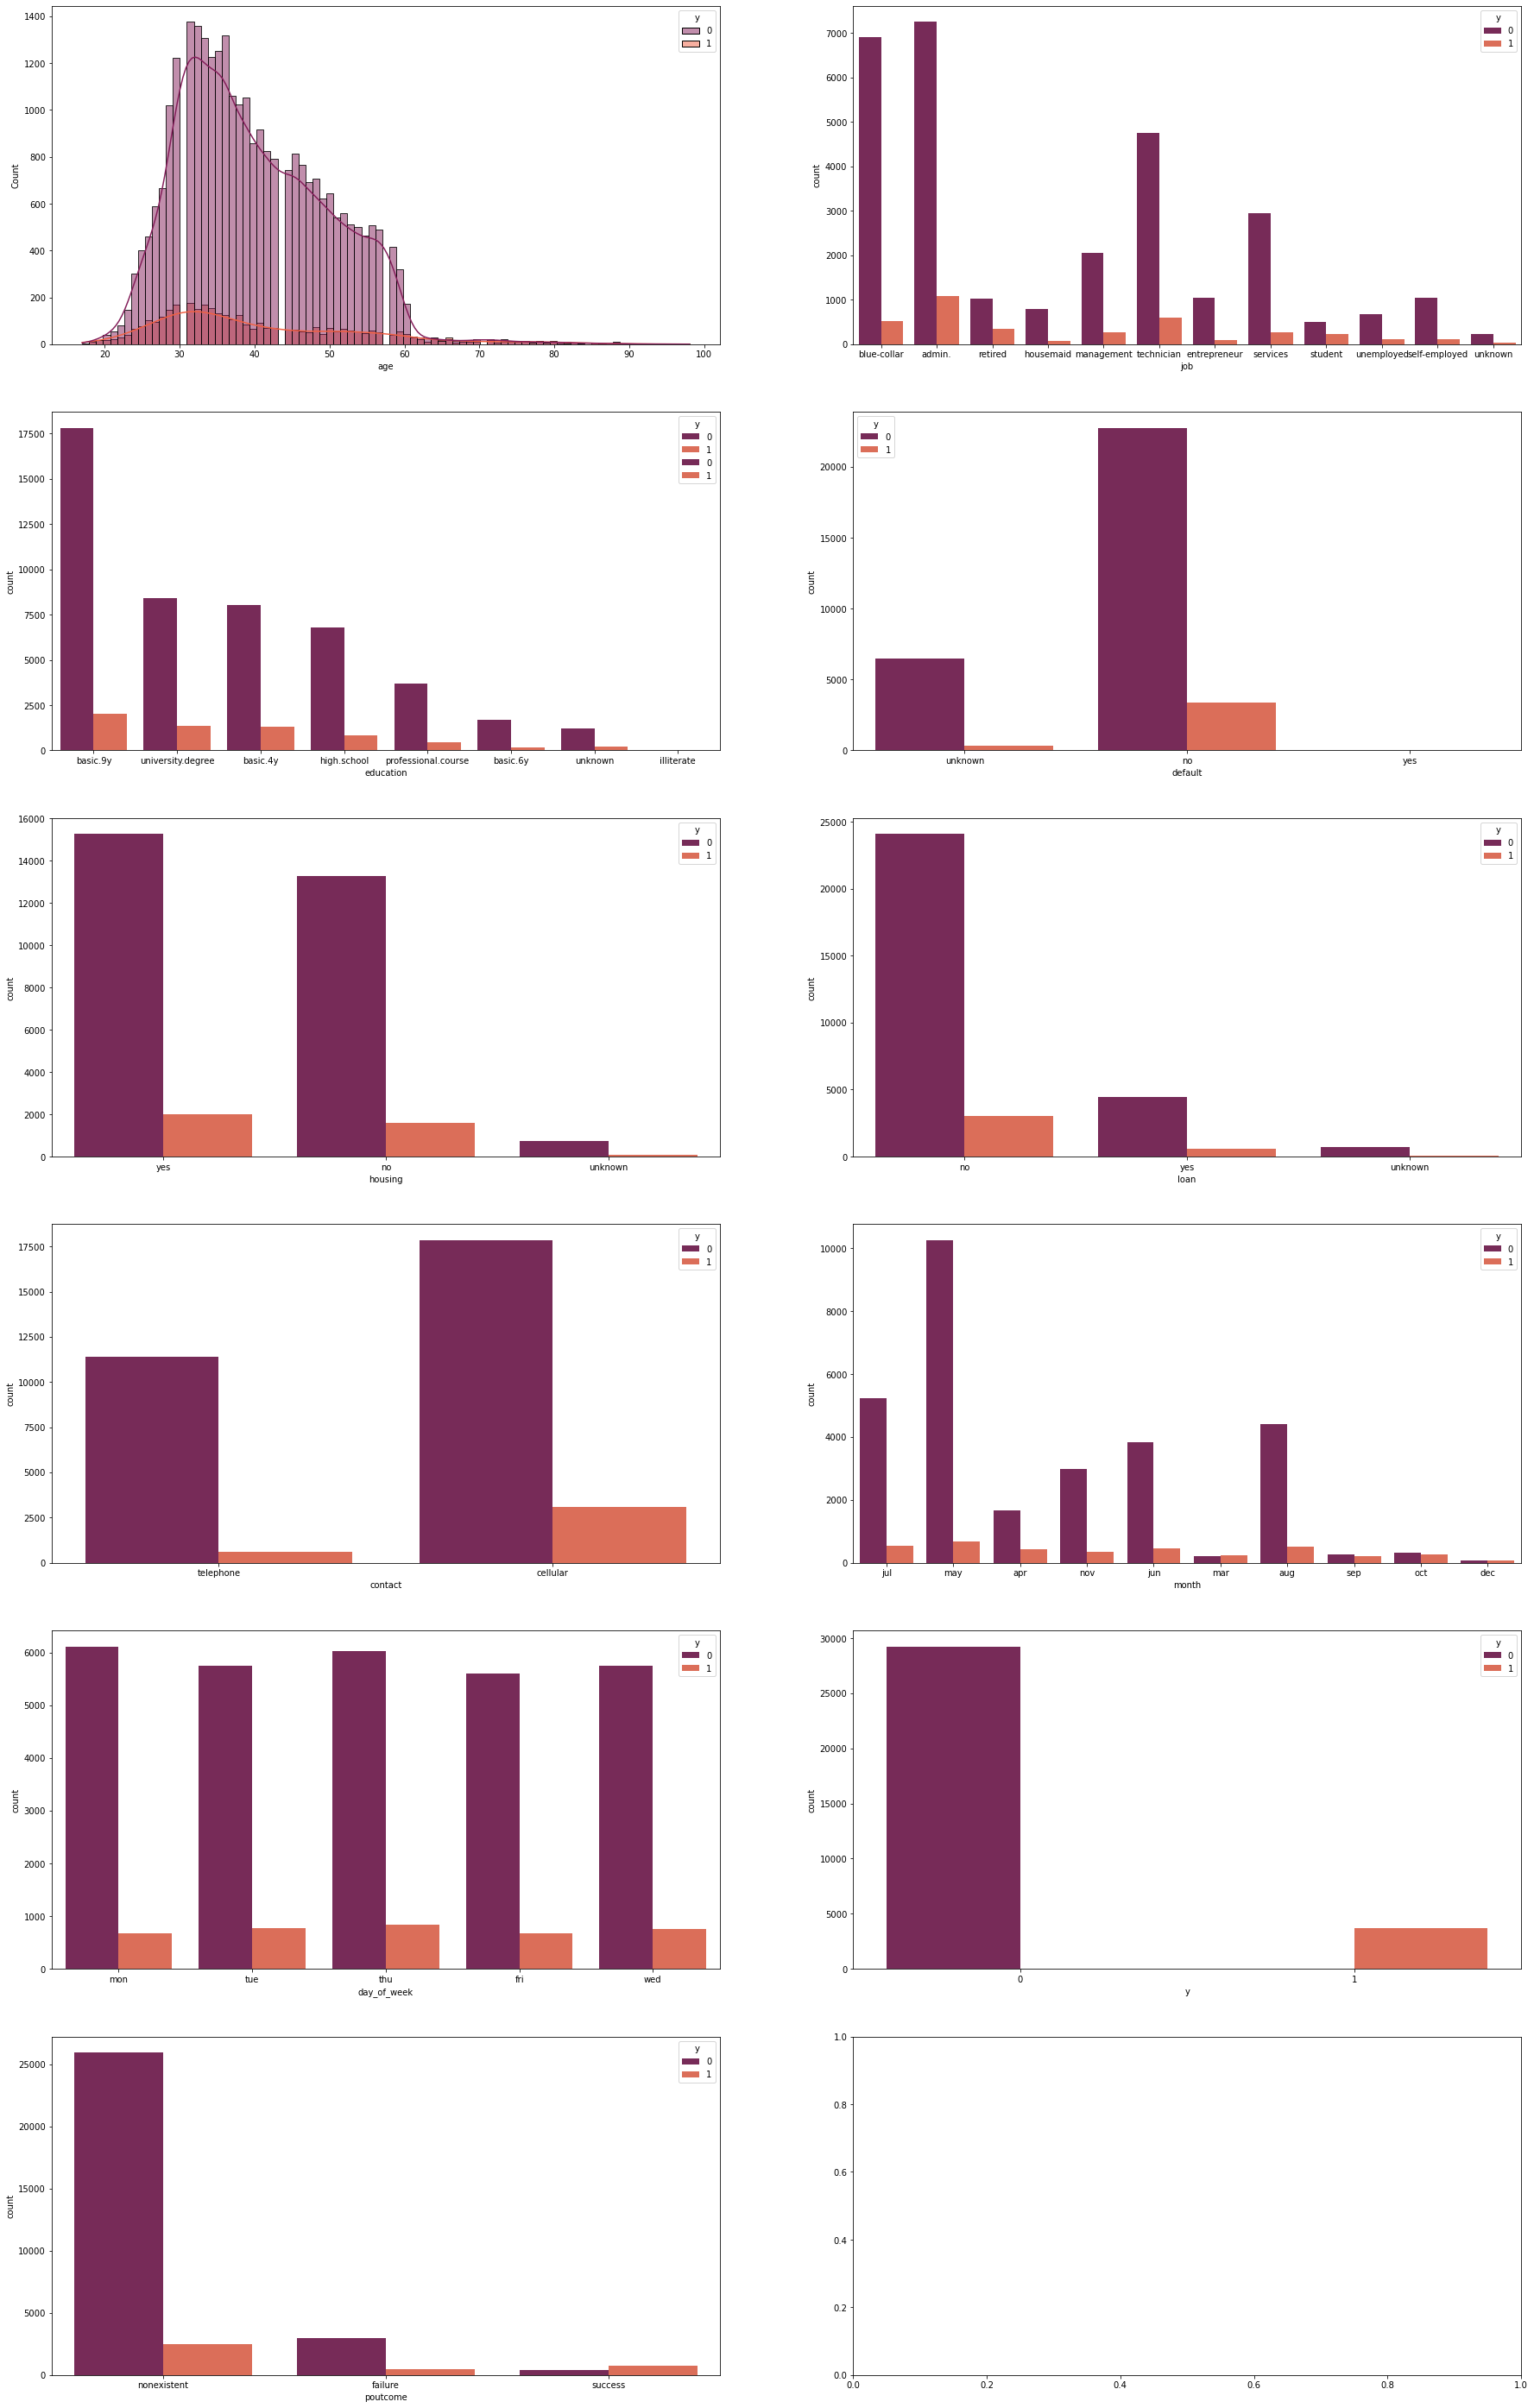

In [6]:
fig, axs = plt.subplots(6,2)
fig.set_size_inches(30.5, 50.5)  

sns.histplot(
    data = DATA[['age','y']],
    hue='y',x="age",
    kde=True,
    palette='rocket',
    ax=axs[0][0]
    )
sns.countplot(
    data=DATA[['job','y']],
    x='job',
    hue='y',
    palette='rocket',
    ax = axs[0][1]
    )
sns.countplot(
    data=DATA[['marital','y']],
    x='marital',
    hue='y',
    palette='rocket',
    ax = axs[1][0]
    )
sns.countplot(
    data=DATA[['education','y']],
    x='education',
    hue='y',
    palette='rocket',
    ax = axs[1][0]
    )
sns.countplot(
    data=DATA[['default','y']],
    x='default',
    hue='y',
    palette='rocket',
    ax = axs[1][1]
    )
sns.countplot(
    data=DATA[['housing','y']],
    x='housing',
    hue='y',
    palette='rocket',
    ax = axs[2][0]
    )
sns.countplot(
    data=DATA[['loan','y']],
    x='loan',
    hue='y',
    palette='rocket',
    ax = axs[2][1]
    )
sns.countplot(
    data=DATA[['contact','y']],
    x='contact',
    hue='y',
    palette='rocket',
    ax = axs[3][0]
    )
sns.countplot(
    data=DATA[['month','y']],
    x='month',
    hue='y',
    palette='rocket',
    ax = axs[3][1]
    )
sns.countplot(
    data=DATA[['day_of_week','y']],
    x='day_of_week',
    hue='y',
    palette='rocket',
    ax = axs[4][0]
    )
sns.countplot(
    data=DATA[['y']],
    x='y',
    hue='y',
    palette='rocket',
    ax = axs[4][1]
    )
sns.countplot(
    data=DATA[['y','poutcome']],
    x='poutcome',
    hue='y',
    palette='rocket',
    ax = axs[5][0]
    )


## Valeurs manquantes (unknown)

In [7]:
unknown_cols = ["default","job","education","loan","housing","marital"]

def nombre_valeurs_inconnus(col):
    return len(DATA[DATA[col] == "unknown"]) /nombre_enregistrements * 100

for col in unknown_cols:
    print("la colonne {} possède : {:.2f} % de données manquantes".format(col,nombre_valeurs_inconnus(col)))

la colonne default possède : 20.81 % de données manquantes
la colonne job possède : 0.80 % de données manquantes
la colonne education possède : 4.25 % de données manquantes
la colonne loan possède : 2.46 % de données manquantes
la colonne housing possède : 2.46 % de données manquantes
la colonne marital possède : 0.19 % de données manquantes


## Pdays

In [8]:
pdays_999 = len(DATA[DATA["pdays"] == 999])/nombre_enregistrements * 100
pdays_999
print("Les clients n'ayant pas été contacté récemment représentent {:.2f} % des enregistrements ".format(pdays_999))

Les clients n'ayant pas été contacté récemment représentent 96.35 % des enregistrements 


# Modèles 

## Modèles choisis

In [9]:
# Classifier de reserve
classifiers = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(probability=True,verbose=True),
    'LogisticRegression': LogisticRegression(verbose=True),
    'RandomForestClassifieur': RandomForestClassifier(verbose=True),
    'NB': GaussianNB(),
    'adaboost':AdaBoostClassifier()
}

# Classifier en traitrement 

classifiers1 = {
    'RandomForestClassifieur': RandomForestClassifier(n_jobs=-1),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'LogisticRegression': LogisticRegression()

}
meilleurs = {
    # 'LogisticRegression': LogisticRegression()
    # 'RandomForestClassifieur': RandomForestClassifier(n_jobs=-1),
    'adaboost':AdaBoostClassifier()
}

# Meilleurs


## Hyperparamètres

In [10]:
params_gs = {
    'KNeighborsClassifier' :[
        {'n_neighbors': list(range(1,15))},
        {'metric': ['minkowski','euclidean','manhattan']}],
    'DecisionTreeClassifier':[
        {'max_depth':  [80, 90, 100, 110,200,300]},
        {'criterion': ['gini', 'entropy']},
        {'min_samples_leaf': [5,10,15,20,25]}],
    'SVC':[
        {'C': [0.001, 0.01, 0.1, 1, 10], 
        'gamma' : [0.001, 0.01, 0.1, 1], 
        'kernel': ['linear','rbf']}],
    'LogisticRegression' : [
        {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        'C' : np.logspace(-4, 4, 20),
        'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
        'max_iter' : [100, 1000,2500, 5000]}],
    'RandomForestClassifieur' : [{
        'n_estimators':[2000,2500,3000],
        'max_depth': [None],
        'min_samples_split': [8, 10, 50],
        'criterion':['gini','entropy'],
        'class_weight':[{0:0.80,1:0.20}],
        'max_features':['log2']}],
    'NB' : [{'var_smoothing': np.logspace(0,-9, num=100)}],
    'adaboost':[
        {
            'base_estimator':[DecisionTreeClassifier()],
            'n_estimators':[800, 900],
            'learning_rate':[0.8],
            'algorithm':['SAMME.R']
        }


    ]
    }

## Fonctions utiles

In [31]:
def cus_pr_auc(x, y):
    score=roc_auc_score(x, y)
    return score

def experience(X,Y,classifiers,pretraitements:Pipeline,search,strategie="grid_search",courbe_roc = False,cross_val=2,train_size = 0.7,write_prediction = False,verbose=False,n_iter=5):

# Expérience split train/test
    best_params = {}

    # Certains attributs sont absents dans les données de test, il est necessaire d'appliquer les pretraitement sur touts les données
    all = pd.concat([X,test_data],axis=0)
    p = pretraitements.fit(all)

    _X = p.transform(X)
    x_train, x_test, y_train, y_test = train_test_split(_X,Y, train_size = train_size, random_state=0)
    
    if strategie == "grid_search":
        print("strategie = {}".format(strategie))
        for key,val in classifiers.items():
            print("Traitement du classifier {}".format(key))
            gs_classifier_hpo = GridSearchCV(
                                    val,
                                    search[key],
                                    scoring=make_scorer(cus_pr_auc,greater_is_better=True),
                                    verbose=verbose,
                                    cv=cross_val
                                    )
            gs_classifier_hpo.fit(x_train,y_train)
            result_df = pd.DataFrame(gs_classifier_hpo.cv_results_)
            
            best_params[key]={
            "best":gs_classifier_hpo.best_estimator_,
            "roc_auc":roc_curve(y_test,gs_classifier_hpo.predict_proba(x_test)[:,1], pos_label=1),
            "mean_fit_time":pd.Series(result_df["mean_fit_time"]),
            "mean_test_score":pd.Series(result_df["mean_test_score"]),
            "best_params":pd.Series(result_df["params"])
            }
    
    elif strategie == "randomized_search":
        print("strategie = {}".format(strategie))
        for key,val in classifiers.items():
            print("Traitement du classifier {}".format(key))
            gs_classifier_hpo = RandomizedSearchCV(
                                    val,
                                    search[key],
                                    scoring=make_scorer(cus_pr_auc,greater_is_better=True),
                                    verbose=verbose,
                                    cv=cross_val,
                                    n_iter=n_iter
                                    )
            gs_classifier_hpo.fit(x_train,y_train)
            result_df = pd.DataFrame(gs_classifier_hpo.cv_results_)
            
            best_params[key]={
            "best":gs_classifier_hpo.best_estimator_,
            "roc_auc":roc_curve(y_test,gs_classifier_hpo.predict_proba(x_test)[:,1], pos_label=1),
            "mean_fit_time":pd.Series(result_df["mean_fit_time"]),
            "mean_test_score":pd.Series(result_df["mean_test_score"]),
            "best_params":pd.Series(result_df["params"])
            }
            
    if(write_prediction == True):
        for key,val in classifiers.items():
            print("bestt {}".format(best_params[key]))
            clf = best_params[key]['best']
            clf.fit(_X,Y)
            predict = pd.DataFrame(
                {"Id":[i for i in range(1,len(test_data)+1)],
                "Predicted":clf.predict_proba(p.transform(test_data))[:,1]
                })

            # Fichier réponse
            dt = datetime.datetime.now()
            filename = key+".csv"
            predict.to_csv(filename,index=False)


    # Visualisation 
    if(courbe_roc == True):
        fig ,axs = plt.subplots()
        fig.set_size_inches(10.5, 10.5)
        axs.set_title("Comparaisons des classfieurs après optimisation des hyperparamètres")

        axs.set_xlabel("FPR")
        axs.set_ylabel("TPR")

        for key,val in classifiers.items():
            fpr, tpr, _ = best_params[key]["roc_auc"]
            axs.plot(fpr,tpr,label="{} (AUC = {:.2f})".format(key,auc(fpr,tpr)))

        plt.legend(loc="upper left")
    return best_params

        



# Prétraitements

In [29]:
var_num_id = [0,11,12,14,15,16,17,18]
# var_num_id = [0,11,14,15,16,17,18]
var_cat_id = [1,2,3,4,5,6,7,8,9,10,13]

# Cette pipeline transforme les variables catégoriques en encodage one hot 
# et réalise un centrage pour les valeurs numériques
Pretraitements_0 = Pipeline([
    ('base',ColumnTransformer(transformers=[
        ("onehot", OneHotEncoder(sparse=False),var_cat_id),
        ("scaler",StandardScaler(),var_num_id)],remainder='passthrough'))
        ])

# Ordinal encodeur
p1 = Pipeline([
    ('base',ColumnTransformer(transformers=[
        ("oe", OrdinalEncoder(),var_cat_id),
        ("scaler",StandardScaler(),var_num_id)],remainder='passthrough'))
        ])

# Nulle
p2 = Pipeline([
    ('base',ColumnTransformer(transformers=[
        ("oe", OrdinalEncoder(),var_cat_id),
        ("scaler",StandardScaler(),var_num_id)],remainder='passthrough')),
        ('select',PCA())
        ])


p3 = Pipeline([
    ('imputer',SimpleImputer(missing_values="unknown",strategy="most_frequent")),
    ('base',ColumnTransformer(transformers=[
        ("oe", OrdinalEncoder(),var_cat_id),
        ("scaler",StandardScaler(),var_num_id)],remainder='passthrough'))
        ])

p4 = Pipeline([
    ('imputer',SimpleImputer(missing_values="unknown",strategy="most_frequent")),
    ('base',ColumnTransformer(transformers=[
        ("oe", OrdinalEncoder(),var_cat_id),
        ("scaler",StandardScaler(),var_num_id)],remainder='drop'))
        ])
p5 = Pipeline([
    ('base',ColumnTransformer(transformers=[
        ("oe", OrdinalEncoder(),var_cat_id),
        ("scaler",StandardScaler(),var_num_id)],remainder='drop'),
        ('')
        )
        ])




# Test de différents prétraitements

In [37]:
x = SelectKBest(k=10).fit_transform(p5.fit_transform(X),Y)


In [34]:

experience(
    X,Y,
    meilleurs,
    p5,
    params_gs,
    strategie="grid_search",
    train_size=0.8,
    courbe_roc=True,
    cross_val=5,
    n_iter=3,
    write_prediction=True)

strategie = grid_search
Traitement du classifier adaboost


KeyboardInterrupt: 